# The Analysis of Algorithims

 - Primary analysis tool
   - characterizing the running times of algorithms and data structure operations
   - Space usage  
 - Running time is a natural measure of “goodness,”
    - time is a precious resource
    - computer solutions should run as fast as possible

 ## Motivation
 
 - Sometimes it is necessary to have a precise understanding of the complexity of an algorithm.
 
 - In order to obtain this understanding we could proceed as follows:  
   <ol>
    <li>We implement the algorithm in a given programming language.</li>
 	<li> We count how many additions, multiplications, assignments, etc.~are needed</li>
    <li> for an input of a given size.  Additionally, we have to count all storage accesses.</li>
 	<li> We look up the amount of time that is needed for the different operations in the processor handbook.</li>
 	<li> Using the information discovered in the previous two steps we predict the running
 	time of our algorithm for given input.</li>
  </ol>

###  Experimental Studies

```python
from time import time

start time = time( ) # record the starting time
run algorithm    
end time = time( )   # record the ending time
elapsed = end time − start time # compute the elapsed time
```

### Naive Approach
$S~=~1+2+3+ ...+n$

In [14]:
import time


def sum_of_n_2(n):
    start = time.time()

    the_sum = 0
    for i in range(1, n + 1):
        the_sum = the_sum + i

    end = time.time()

    return the_sum, end - start

for i in range(5):
    print("Sum is %d required %10.6f seconds" % sum_of_n_2(10000))
    


Sum is 50005000 required   0.000841 seconds
Sum is 50005000 required   0.001362 seconds
Sum is 50005000 required   0.001088 seconds
Sum is 50005000 required   0.001040 seconds
Sum is 50005000 required   0.001048 seconds


### Alternative Approach

$S~=~1 + 2   +  3+ ...+n$


$S~=~n + (n-1) + (n- 2)+ .... + 1$

$2S = (n+1) + (n+1)+ .... + (n+1) = n * (n +1)$

$S = \frac{n* (n+1)} {2}$

In [15]:
def sum_of_n_3(n):
    start = time.time()

    the_sum = ((n+1)*n)/2.0

    end = time.time()

    return the_sum, end - start

for i in range(5):
    print("V2: Sum is %d required %10.6f seconds" % sum_of_n_3(10000))

V2: Sum is 50005000 required   0.000001 seconds
V2: Sum is 50005000 required   0.000001 seconds
V2: Sum is 50005000 required   0.000000 seconds
V2: Sum is 50005000 required   0.000001 seconds
V2: Sum is 50005000 required   0.000001 seconds


## Moving Beyond Experimental Analysis
  - Our goal is to develop an approach to analyzing the efficiency of algorithms that:
    1. Allows us to evaluate the relative efficiency of any two algorithms in a way that is independent of the hardware and software environment.
    2. Is performed by studying a high-level description of the algorithm without need for implementation.
    3. Takes into account all possible inputs.

  - ### Counting Primitive Operations
  - ### Measuring Operations as a Function of Input Size
  - ### Focusing on the Worst-Case Input

### Counting Primitive Operations
  - Perform analysis directly on a high-level description of the algorithm
  - Identify and analyse primitive operations - **a primitive operation is low-level instruction with an execution time that is constant** e.g.,
    - Assigning an identifier to an object
    - Determining the object associated with an identifier
    - Performing an arithmetic operation (for example, adding two numbers) • Comparing two numbers
    - Accessing a single element of a Python list by index
    - Calling a function (excluding operations executed within the function) • Returning from a function.
  - A primitive operation is basic operation that is executed by the hardware 
  - Many of our primitive operations may be translated to a small number of instructions. 
  - Instead of trying to determine the specific execution time of each primitive operation, we will count   
      - how many primitive operations are executed
      - use this number $t$ as a measure of the running time of the algorithm.

### Measuring Operations as a Function of Input Size
  - Capture the order of growth of an algorithm’s running time
  - A function $f(n)$ that characterizes the number of primitive operations that are performed as a function of the input size n

### Focusing on the Worst-Case Input
* **Worst-case:** $T(n)$ The maximum steps/time/memory taken by an algorithm to
complete the solution for inputs of size $n$

* **Average-case:** The expected time over all inputs with the same characteristics
(e.g. size).

* **Best-case:** The performance in ideal situations. Rarely used.

Worst-case analysis is much easier than average-case analysis, as it requires only the ability to identify the worst-case input, which is often simple.

When analysing algorithmic performance, we ignore computational resources (e.g.
CPU speed); we only care about the growth of $T(n)$ as $n \rightarrow \infty$



This is called the **asymptotic behaviour**

![Runtime Analysis](fig3.2.png)

## Growth Function 
1. $f(x) = n$ (constant function)
  - for any argument $n$, the constant function $f(n)$ assigns the value $c$.
2. $f(n) = log_b(n)$ (logarithmic function)
  - $x=\log_bn$ if and only if $b^x = n$.
3. $f(x) = sqrt(x)$ (square root function)
4. $f(x) = x$ (linear function)
5. $f(x) = nlog(n)$ (log-linear function)
6. $f(x) = x^2$ (quadratic function)
7. $f(x) = x^3$ (cubic function)
7. $f(x) = a^x, \forall a > 1$ (exponential function)

## Math Review

### Exponentiation
  Exponents have a number of important properties, including:
  
  \begin{align}
		b^0 &= 1 \\
		b^1 &= b \\
		b^{1/2} &= b^{0.5} = \sqrt{b} \\
		b^{-1} &= \frac{1}{b} \\
		b^a \cdot b^c &= b^{a + c} \\
		(b^a)^c &= b^{ac}
	\end{align}
    
    
    

### Logarithms
	
   **Definition**: $\log_b a = c$ if and only if $a = b^c$. If $b = 2$, we write $\lg a$.
	
   There are a number of log identities you should be aware of:
	
   \begin{align}
		\log_b (a \cdot c) &= \log_b a + \log_b c \\
		\log \left( \frac{a}{c} \right) &= \log_b a - \log_b c \\
		\log(a^c) &= c \cdot \log_b a \\
		b^{\log_c a} &= a^{\log_c b} \\
		\log_b a &= \frac{\log_c a}{\log_c b}
	\end{align}

### Recursive Definitions

 ##### **Factorial** - The **factorial** of a number $n$ is represented by $n!$. Informally, $n! = 1 \cdot 2 \cdot 3 \cdot \ldots \cdot n$. More formally: 

\begin{align*}
			n! = \begin{cases}
				1 & n = 0 \\
				n \cdot (n - 1)! & n > 0
			\end{cases}
\end{align*}

### Recursive Definitions

##### Fibonacci numbers
The **fibonacci numbers** are defined by:
		\begin{align*}
			F_i = \begin{cases}
				0 & i = 0 \\
				1 & i = 1 \\
				F_{i - 2} + F_{i - 1} & i > 1
			\end{cases}
		\end{align*}

### Summations
**Arithmetic Series**
	\begin{align*}
		\sum_{i = 1}^{n} i &= 1+2+3+ \ldots + n = \frac{n(n+1)}{2} \\
		\sum_{i = 1}^{n} i^2 &= \frac{n(n+1)(2n+1)}{6} \\
		\sum_{i = 1}^{n} i^k &\approx \frac{n^{k + 1}}{k + 1} = \Theta(n^{k + 1})
	\end{align*}

### Summations

- **Geometric series**

\begin{align*}
		\sum_{i = 0}^{n} a^i &= 1 + a + a^2+a^3+ ... +a^n= \frac{a^{n + 1} - 1}{a - 1} \\
		\sum_{i = 0}^{\infty} a^i &= \frac{1}{1 - a} \text{ where } a < 1
	\end{align*}

### Polynomials

A polynomial function has the form 

\begin{align*}
f(n) = a_0 +a_1n+a_2n^2 +a_3n^3 +···+a_dn^d 
\end{align*}

where $a_0$ , $a_1$ , . . . , $a_d$ are constants, called the **coefficients** of the polynomial, and $a^d\neq0$.

Integer $d$, which indicates the highest power in the polynomial, is called the **degree** of the polynomial.

### Comparing Growth Rates

In [16]:
# remember to evaluate this cell first!
import matplotlib.pylab as plt
import numpy as np
import math
import timeit
import random
%matplotlib inline

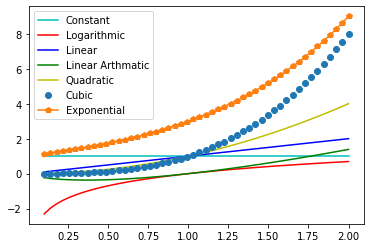

In [17]:
count = 50
xs = np.linspace(0.1, 2, count)
ys_const        = [1] * count
ys_log          = [math.log(x) for x in xs]
ys_linear       = [x for x in xs]
ys_linearithmic = [x * math.log(x) for x in xs]
ys_quadratic    = [x**2 for x in xs]
ys_cubic    = [x**3 for x in xs]
ys_exp    = [3**x for x in xs]



plt.plot(xs, ys_const, 'c', label='Constant')
plt.plot(xs, ys_log, 'r', label = 'Logarithmic')
plt.plot(xs, ys_linear, 'b', label='Linear')
plt.plot(xs, ys_linearithmic, 'g', label='Linear Arthmatic')
plt.plot(xs, ys_quadratic, 'y', label='Quadratic');
plt.plot(xs, ys_cubic, 'o', label='Cubic');
plt.plot(xs, ys_exp, '-p', label='Exponential');
plt.legend()

|constant|logarithm|linear|n-log-n|quadratic|cubic|exponential|
|---|---|---|---|---|---|---|
|1|$log(n)$|$n$| $nlogn$ |$n^2$|$n^3$|$a^n$| 

##### The Ceiling and Floor Functions
  - $\lceil x \rceil =$  the largest integer less than or equal to $x$.
  - $\lfloor x \rfloor =$ the smallest integer greater than or equal to $x$.

# 3.3 Asymptotic Analysis
  - In algorithm analysis, we focus on the growth rate of the running time as a function of the input size $n$, taking a “big-picture” approach.
  - For example, it is often enough just to know that the running time of an algorithm **grows proportionally** to $n$.
   

**A function that returns the maximum value of a Python list.**
```python
def find max(data):
”””Return the maximum element from a nonempty Python list.””” 
biggest = data[0]                       # The initial value to beat
for val in data:                        # For each value:
 if val > biggest                       # if it is greater than the best so far,
        biggest = val                  # we have found a new best (so far)         
 return biggest                        # When loop ends, biggest is the max
```

This is a classic example of an algorithm with a running time that grows **proportional to $n$**, as the loop executes once for each data element, with some fixed number of primitive operations executing for each pass.

## 3.3.1 The “Big-Oh” Notation
  
  
- Let $f(n)$ and $g(n)$ be functions mapping positive integers to positive real numbers. 
- We say that $f(n)$ is $O(g(n))$ 
 - if there is a real constant $c > 0$ and 
 - an integer constant $n_0 \ge 1$ such that 
$$
f(n)\le cg(n) 
$$
for $n\ge n_0$.
 

#### Example :  The function $8n + 5$ is $O(n)$.

**Justification**: 
 - By the big-Oh definition, we need to find a real constant $c > 0$ and an integer constant $n0\ge 1$ such that $8n+5 \le cn$ for every integer $n\ge n_0$. 
 - It is easy to see that a possible choice is $c = 9$ and $n_0 = 5$. 
 - Indeed, this is one of infinitely many choices available because there is a trade-off between $c$ and $n_0$. 
 - For example, we could rely on constants $c = 13$ and $n_0 = 1$.

##### Proposition: The algorithm, find max, for computing the maximum element of a list of n numbers, runs in O(n) time.

**Justification**

 - The initialization before the loop begins requires only a constant number of primitive operations.
 - Each iteration of the loop also requires only a con- stant number of primitive operations. 
 - The loop executes $n$ times.
 - The number of primitive operations being $c' + c".n$ for appropriate constants $c'$ and $c"$

#### Example: $5n^4 +3n^3 +2n^2 +4n+1$ is $O(n4)$.

**Justification**: Note that $5n^4+3n^3+2n^2+4n+1~~\le(5+3+2+4+1)n^4 =cn^4$,
for $c=15$,when $n\ge n_0 =1$.

Thus, the highest-degree term in a polynomial is the term that determines the asymptotic growth rate of that polynomial

**Example**: $5n^2 +3n log n+2n+5$ is $O(n^2)$.

**Example**: $20n^3 +10nlogn+5$ is $O(n^3)$.

**Example**: $2^n+2$ is $O(2^n)$.

### 3.3.2 Big-Omega Notation

  
- Let $f(n)$ and $g(n)$ be functions mapping positive integers to positive real numbers. 
- We say that $f(n)$ is $\Omega(g(n))$ 
 - if there is a real constant $c > 0$ and 
 - an integer constant $n_0 \ge 1$ such that 
$$
f(n)\ge cg(n) 
$$
for $n\ge n_0$.

#### Example: $3n log n − 2n$ is $\Omega(n log n)$.

**Justification**: $3nlogn−2n = nlogn+2n(logn−1) \ge n log n$ for $n \ge 2$; hence, we can take $c=1$ and $n_0 =2$ in this case.

### 3.3.3 Big-Theta Notation

  
- Let $f(n)$ and $g(n)$ be functions mapping positive integers to positive real numbers. 
- We say that $f(n)$ is $\Theta(g(n))$ if $f(n)$ is $O(g(n))$ and $f(n)$ is $\Omega(g(n))$
 - if there is two real constant $c_1 > 0$ and $c_2 > 0$ and 
 - an integer constant $n_0 \ge 1$ such that 
$$
c_1g(n) \le f(n)\ge c_2g(n) 
$$
for $n\ge n_0$.

#### Example: $3nlogn+4n+5logn$ is $\Theta(nlogn)$.

**Justification**: $3nlogn \le 3nlogn+4n+5logn \le (3+4+5)nlogn$ for $n \ge 2$